In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
data = pd.read_csv(r"D:\tutorials\PROGRAMMING\Statistics For Machine Learning\titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

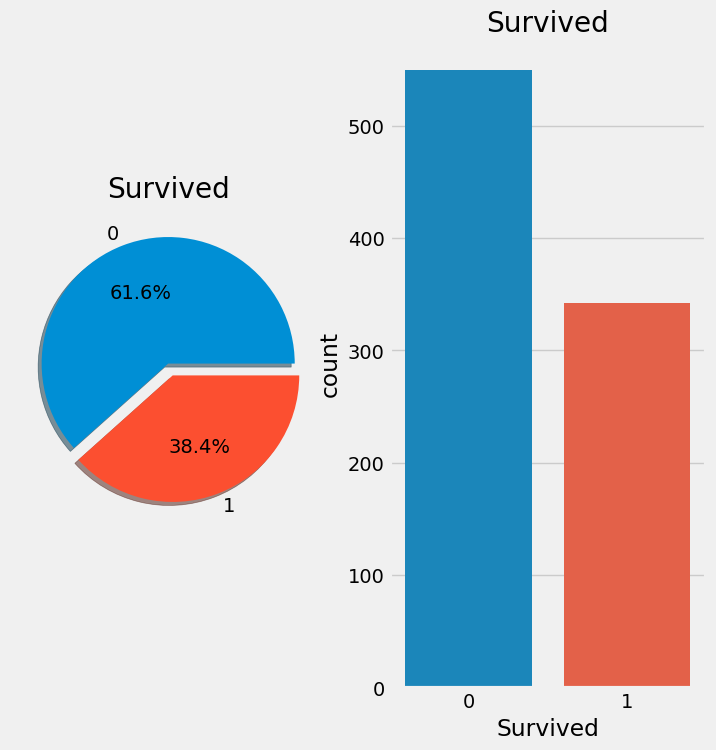

In [13]:
# Get an overall idea of how many have survived

f, ax = plt.subplots(1,2, figsize = (8,8))
data['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")
#  For the 2nd subplot
sns.countplot(data, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Categorical features: 
#        Sex, Embarked (Nominal)
#        Passenger Class - Ordinal Data

### Analyzing SEX (CATEGORICAL NOMINAL)

In [8]:
data.groupby(["Sex", "Survived"])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

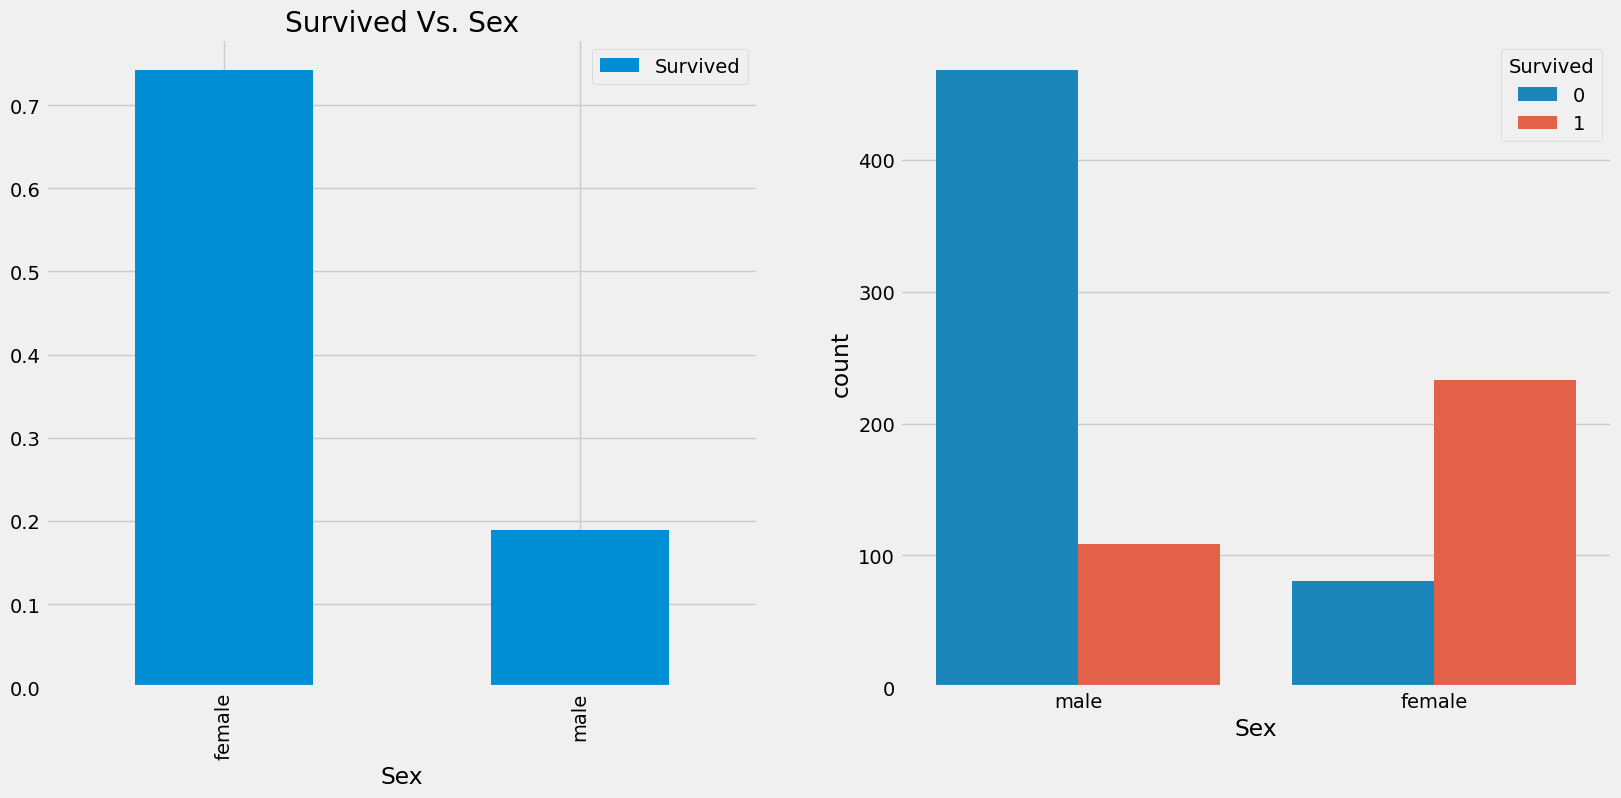

In [11]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived Vs. Sex")
sns.countplot(data, x="Sex", hue="Survived", ax = ax[1])

### Analyzing PASSENGER CLASS (CATEGORICAL - ORDINAL DATA) using Crosstab

In [15]:
pd.crosstab(data['Pclass'], data['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass: Survived vs. Dead')

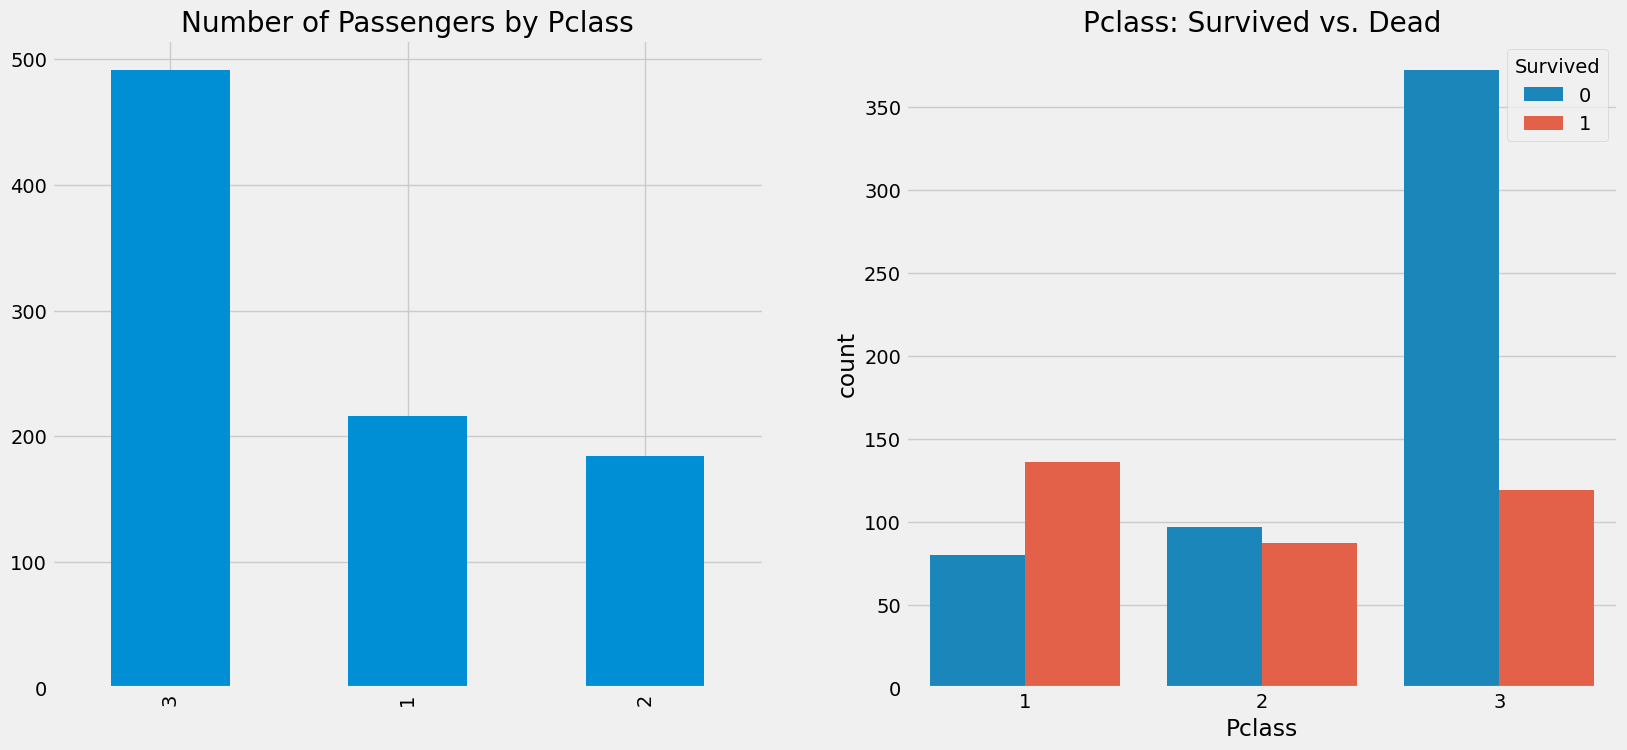

In [19]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Number of Passengers by Pclass")
sns.countplot(data, x='Pclass', hue = 'Survived', ax=ax[1])
ax[1].set_title("Pclass: Survived vs. Dead")

In [20]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins = True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

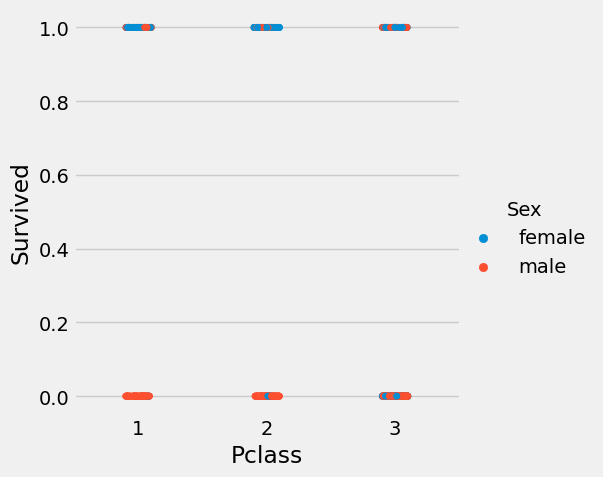

In [26]:
sns.catplot(data, x='Pclass', y='Survived', hue = 'Sex')

### Age - Continuous 

In [27]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Sex: Age vs. Survived')

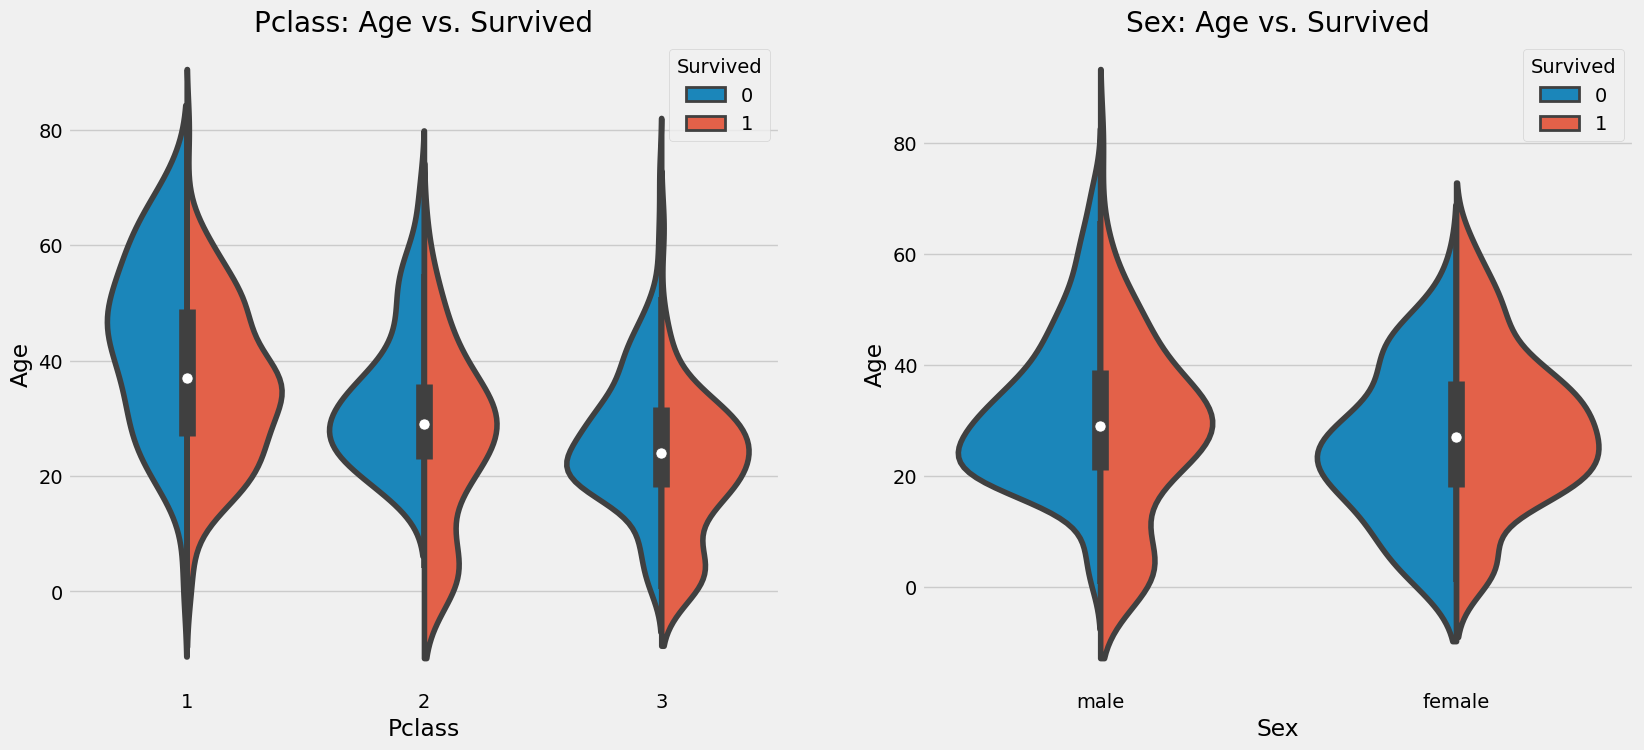

In [32]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot(data, x='Pclass', y='Age', hue='Survived', split = True, ax=ax[0])
ax[0].set_title("Pclass: Age vs. Survived")
sns.violinplot(data, x='Sex', y='Age', hue='Survived', split = True, ax=ax[1])
ax[1].set_title("Sex: Age vs. Survived")


In [33]:
data.isnull().sum()  #this shows that there are 177 rows without age

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
data['Initial'] = 0
for i in data:
  data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [37]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [38]:
pd.crosstab(data['Initial'],data['Sex'])

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [39]:
# replace all misspelled

data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [40]:
pd.crosstab(data['Initial'],data['Sex'])

Sex,female,male
Initial,,
Master,0,40
Miss,186,0
Mr,1,528
Mrs,127,0
Other,0,9


In [41]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [42]:
# Fill #na ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [43]:
data['Age'].isnull().sum()

0

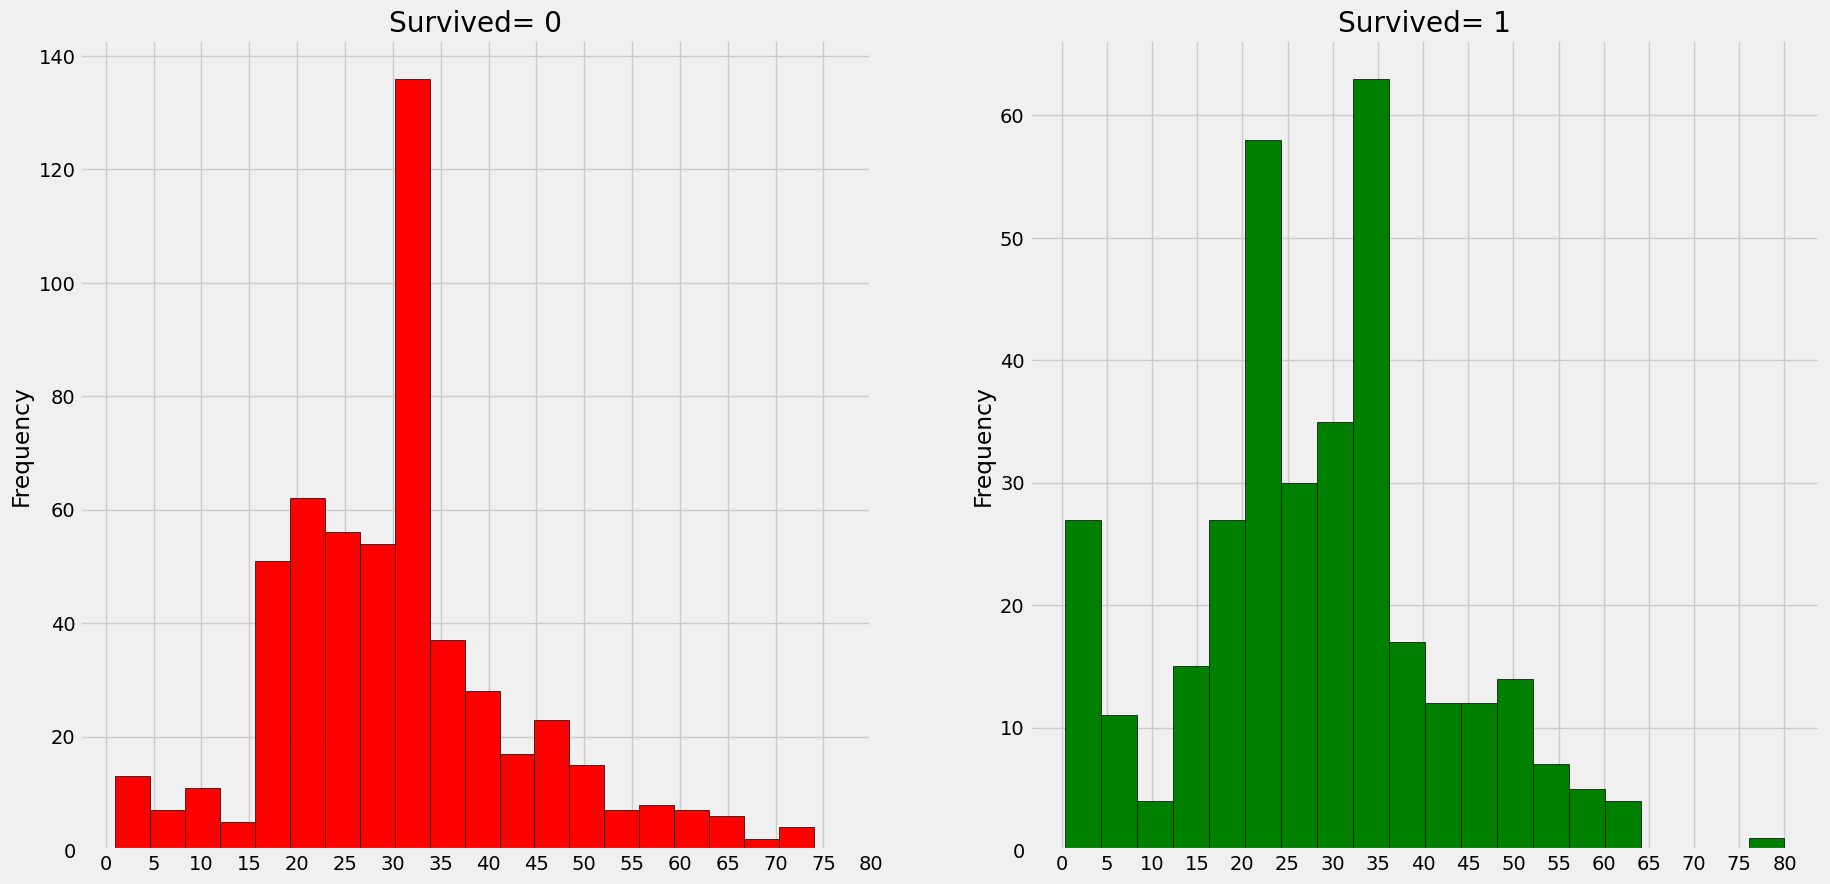

In [45]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')

ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### Embarked (Categorical - Nominal)

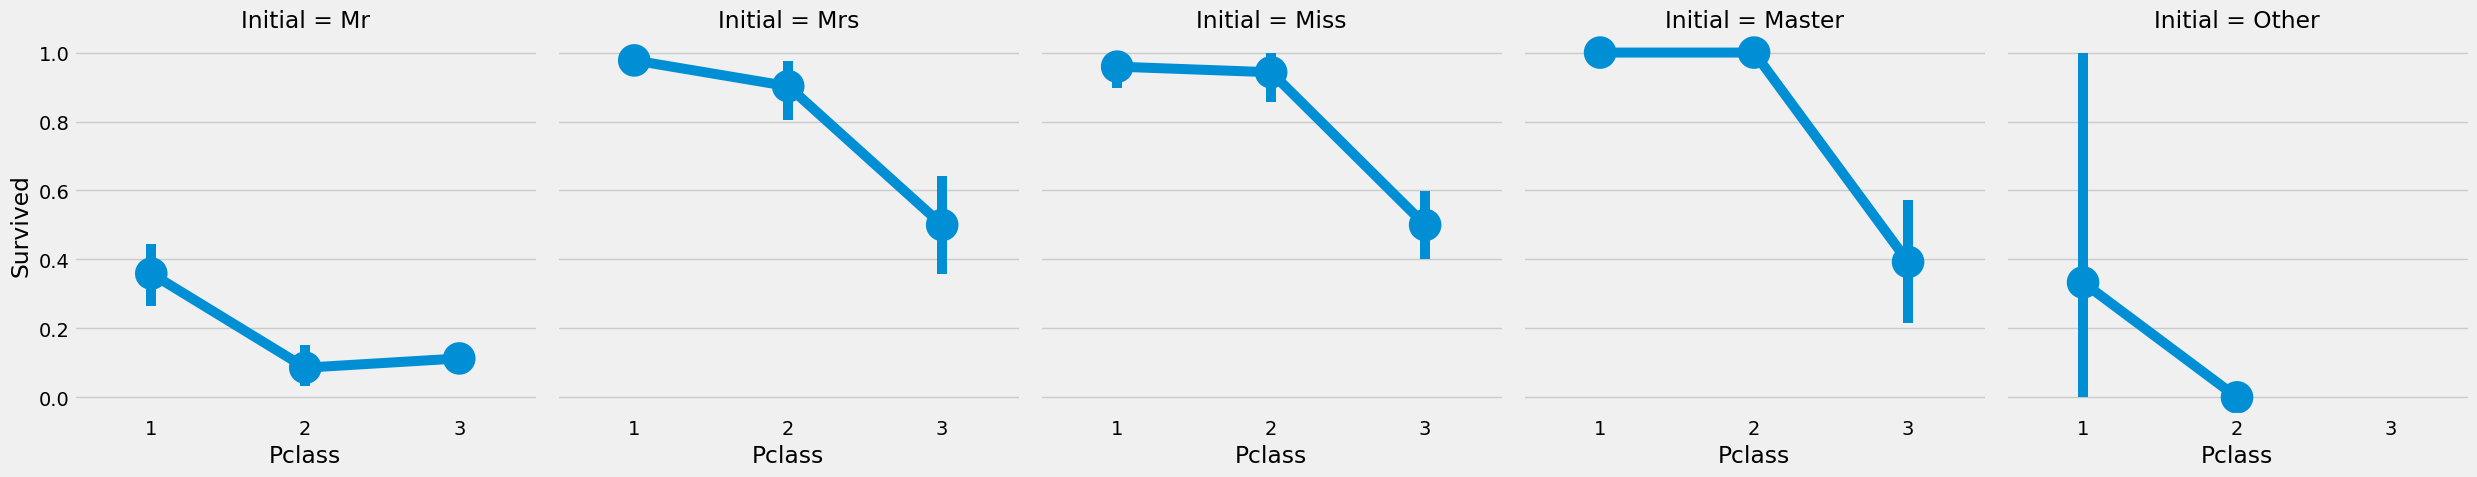

In [57]:
sns.catplot(data, x='Pclass',y='Survived', col='Initial',kind = 'point')

In [47]:
pd.crosstab([data['Embarked'], data['Pclass']], [data['Sex'], data['Survived']], margins = True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

<function matplotlib.pyplot.show(close=None, block=None)>

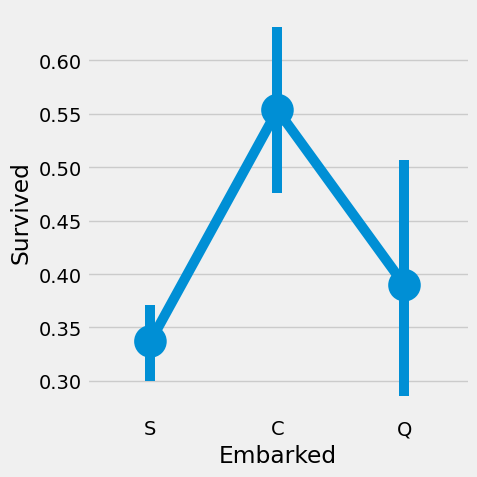

In [54]:
sns.catplot(data, x='Embarked', y='Survived', kind="point")
plt.show

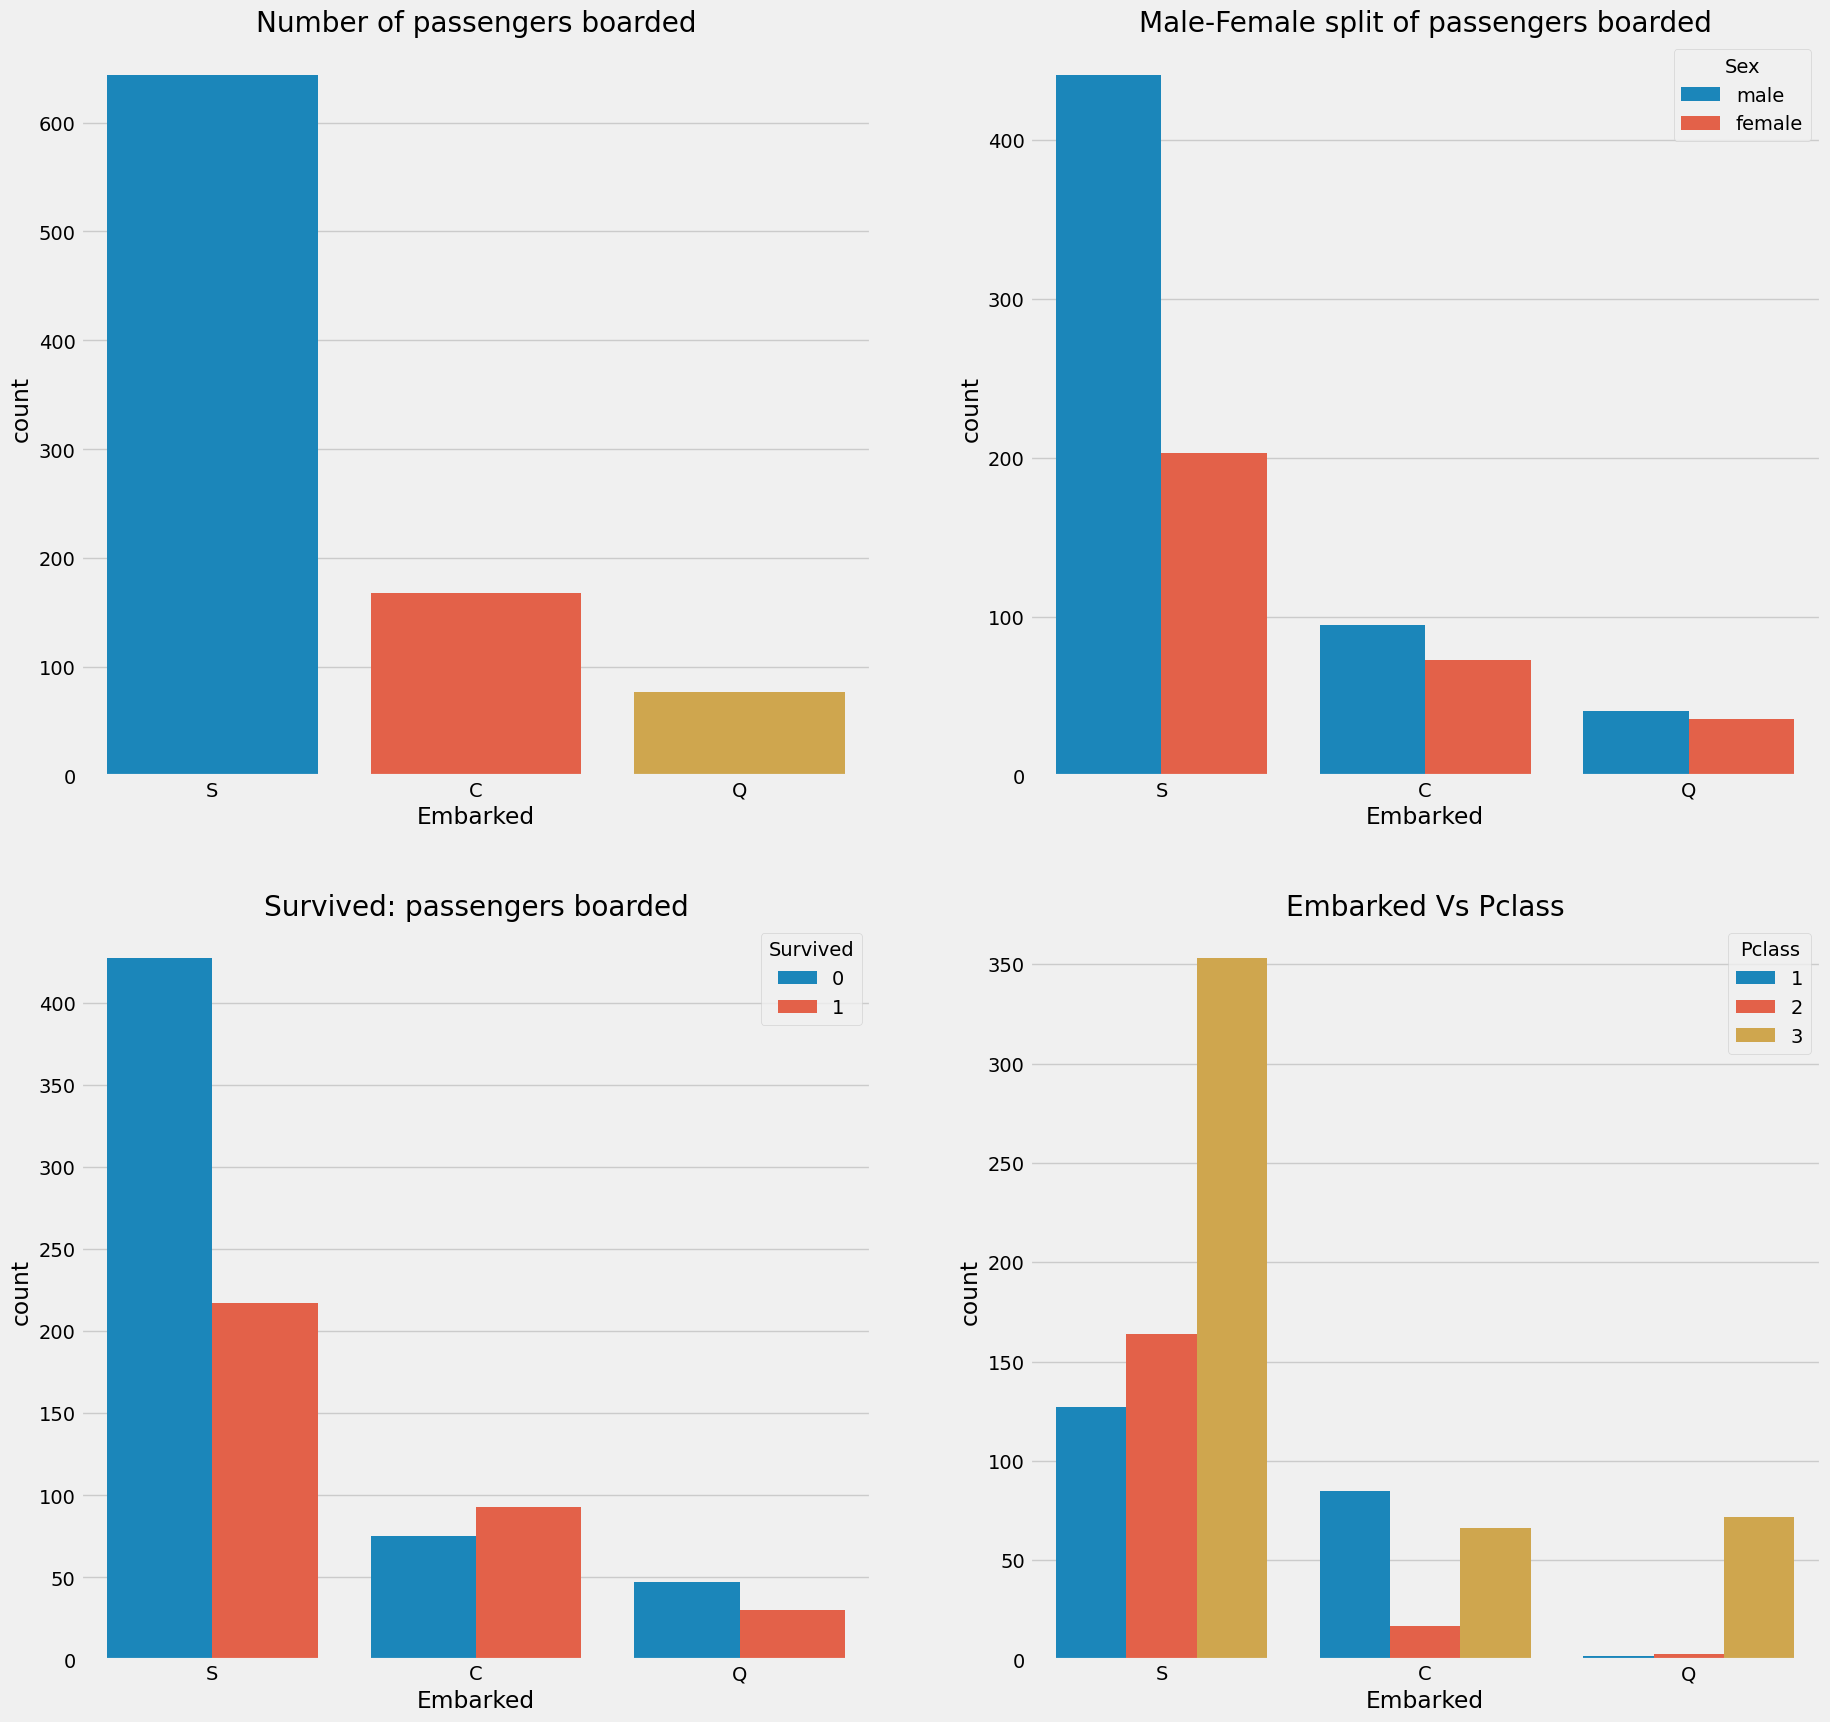

In [62]:
# Creating 4 Subplots

f, ax = plt.subplots(2,2,figsize=(20,20))
sns.countplot(data, x="Embarked",ax=ax[0,0])
ax[0,0].set_title("Number of passengers boarded")


sns.countplot(data, x="Embarked",hue='Sex', ax=ax[0,1])
ax[0,1].set_title("Male-Female split of passengers boarded")


sns.countplot(data, x="Embarked",hue='Survived', ax=ax[1,0])
ax[1,0].set_title("Survived: passengers boarded")


sns.countplot(data, x="Embarked",hue='Pclass', ax=ax[1,1])
ax[1,1].set_title("Embarked Vs Pclass")

plt.show()


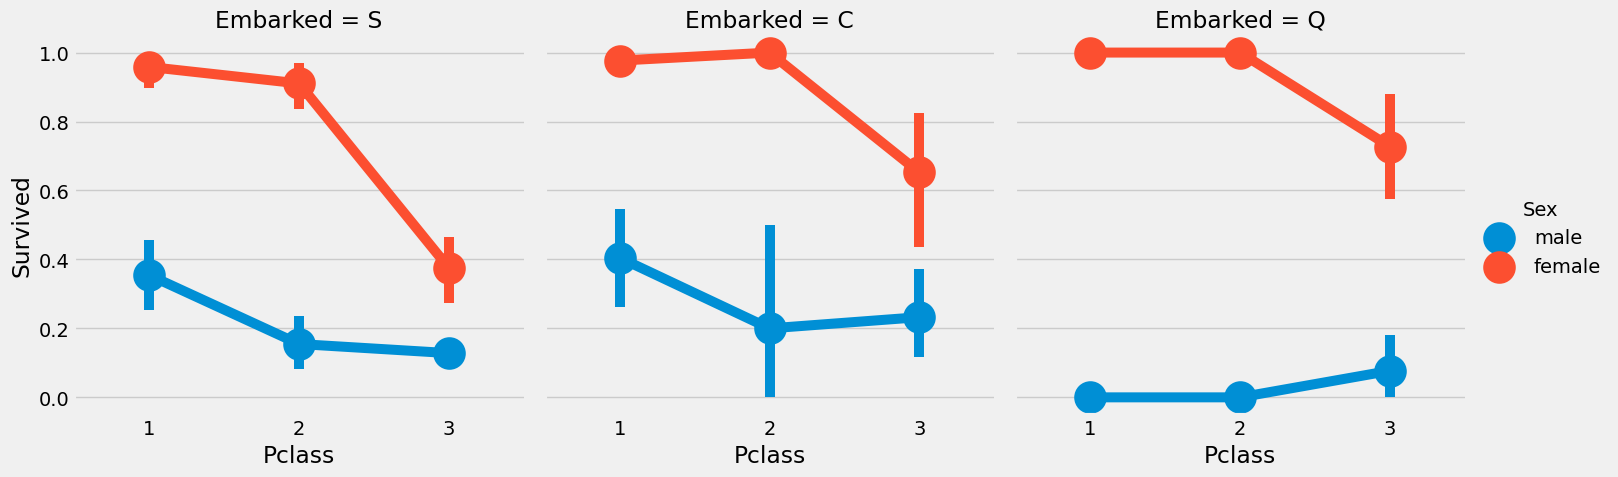

In [63]:
sns.catplot(data, x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='point')

In [64]:
data['Embarked'].isna().sum()

2

In [65]:
#fill na with 'S'

data['Embarked'].fillna('S', inplace = True)

In [66]:
data['Embarked'].isna().sum()

0

In [68]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

### SibSp  - determines if passenger is alone or with companion

In [69]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [70]:
pd.crosstab(data['SibSp'], data['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


c:\users\iamli\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


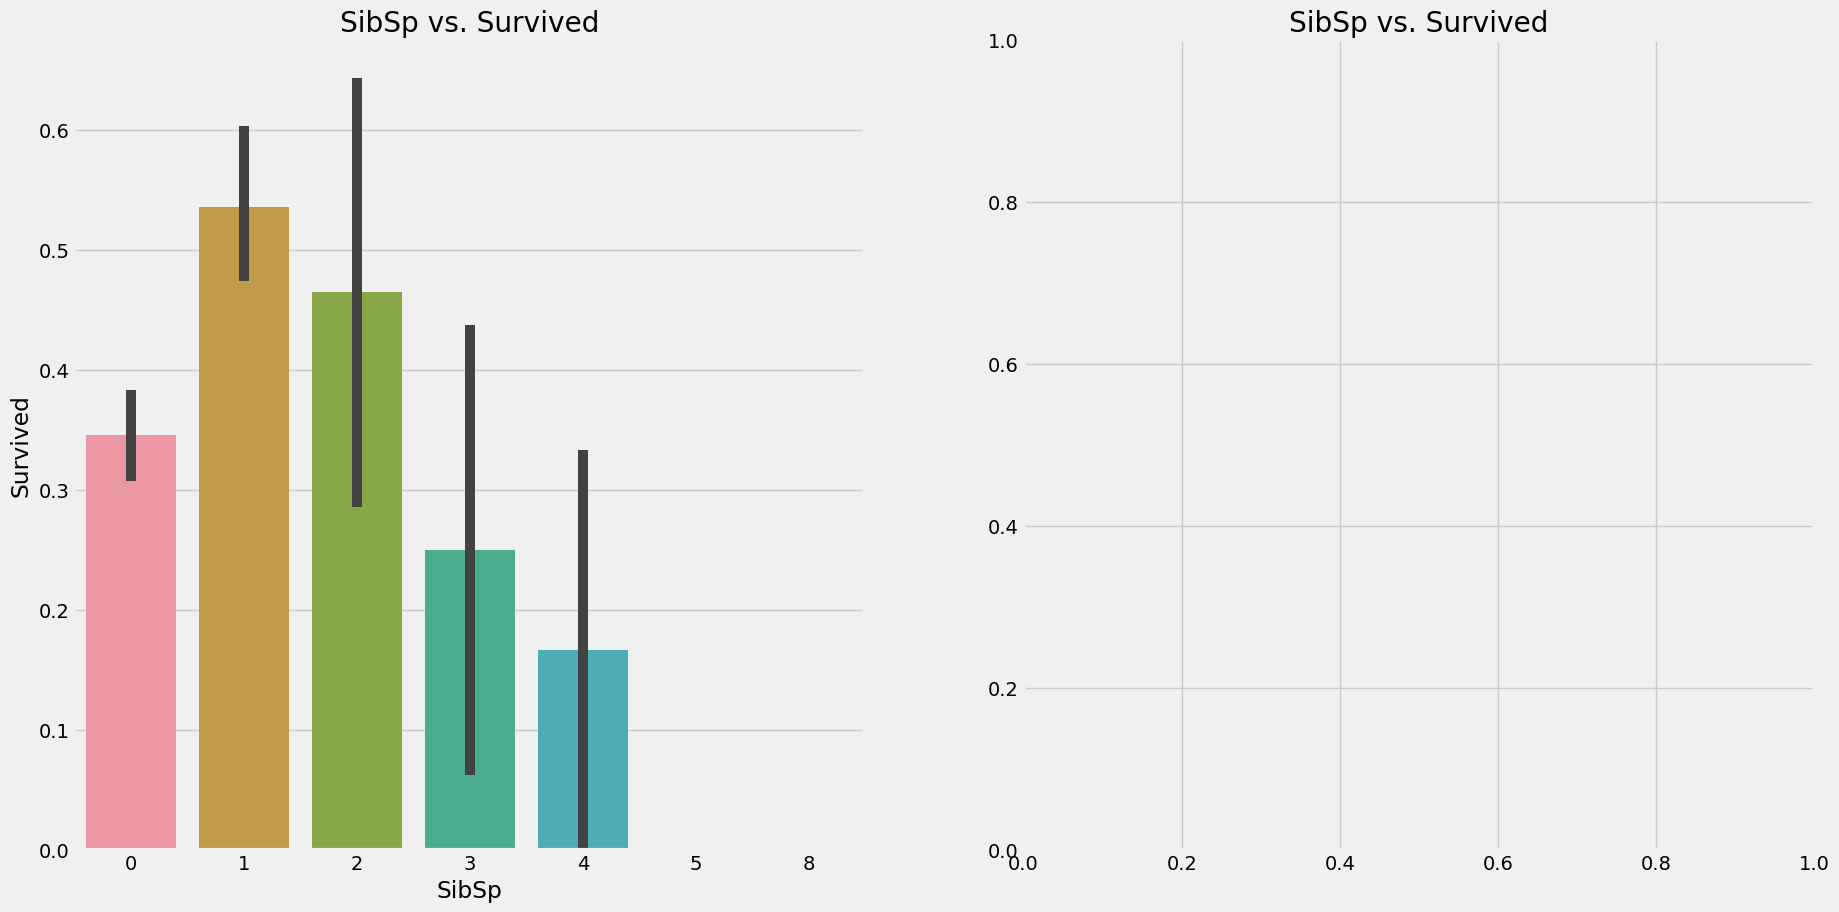

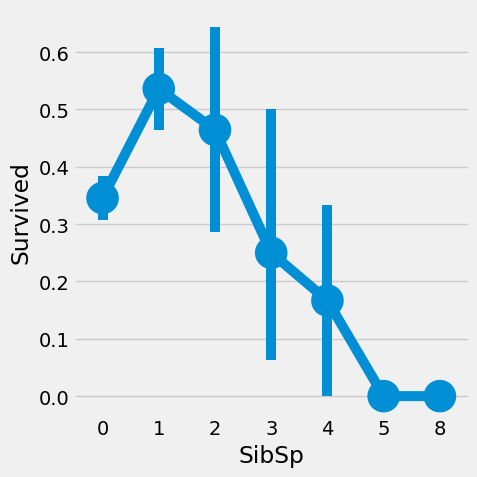

In [75]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.barplot(data, x='SibSp', y='Survived', ax=ax[0])
ax[0].set_title('SibSp vs. Survived')
sns.catplot(data, x = 'SibSp', y = 'Survived', ax = ax[1], kind = 'point')
ax[1].set_title('SibSp vs. Survived')
plt.show()

### Fare - Numerical Continuous Value

In [76]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

c:\users\iamli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
c:\users\iamli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel

Text(0.5, 1.0, 'Fares in Pclass 3')

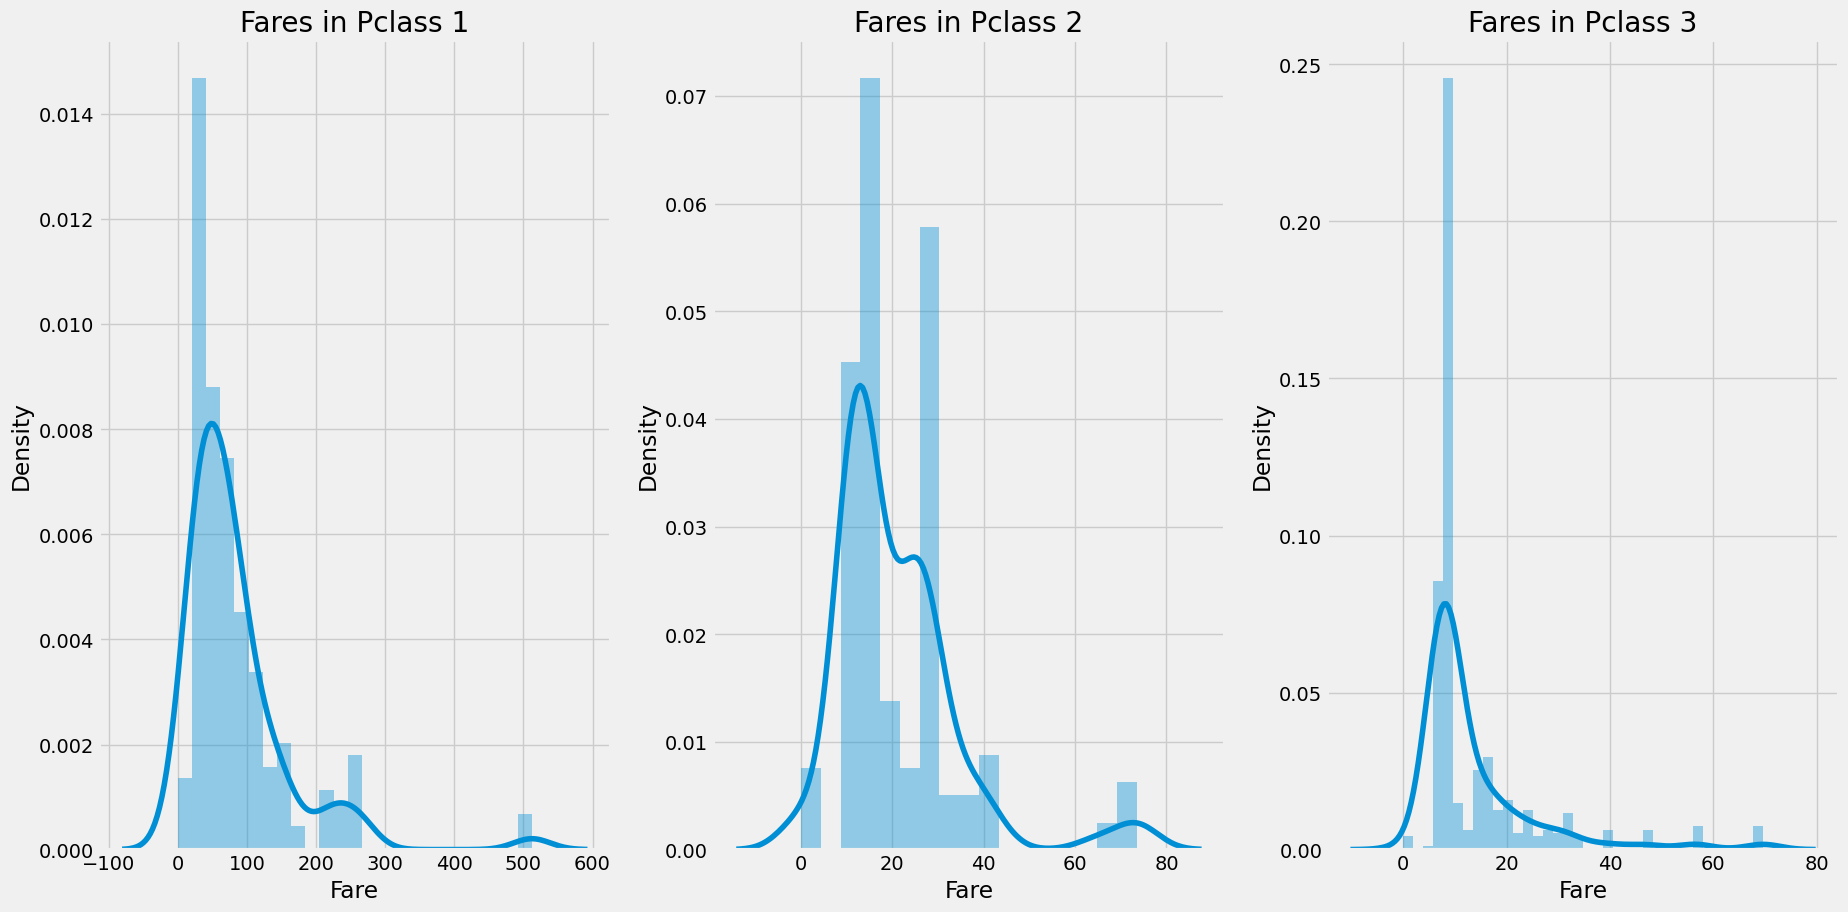

In [80]:
f, ax = plt.subplots(1,3,figsize=(20,10))
sns.distplot(data[data['Pclass']==1]['Fare'], ax=ax[0])
sns.distplot(data[data['Pclass']==2]['Fare'], ax=ax[1])
sns.distplot(data[data['Pclass']==3]['Fare'], ax=ax[2])
ax[0].set_title("Fares in Pclass 1")
ax[1].set_title("Fares in Pclass 2")
ax[2].set_title("Fares in Pclass 3")

### General Summary
*  Women has more survival than men
* Class 1 > Class 2 > Class 3 on survival rate
* Age: Childre with 5-10 have high survival, 15-35 mostly died
* Embarked: C port have higher survival rate


### CORRELATION

* Check if there is a correlation  between our features

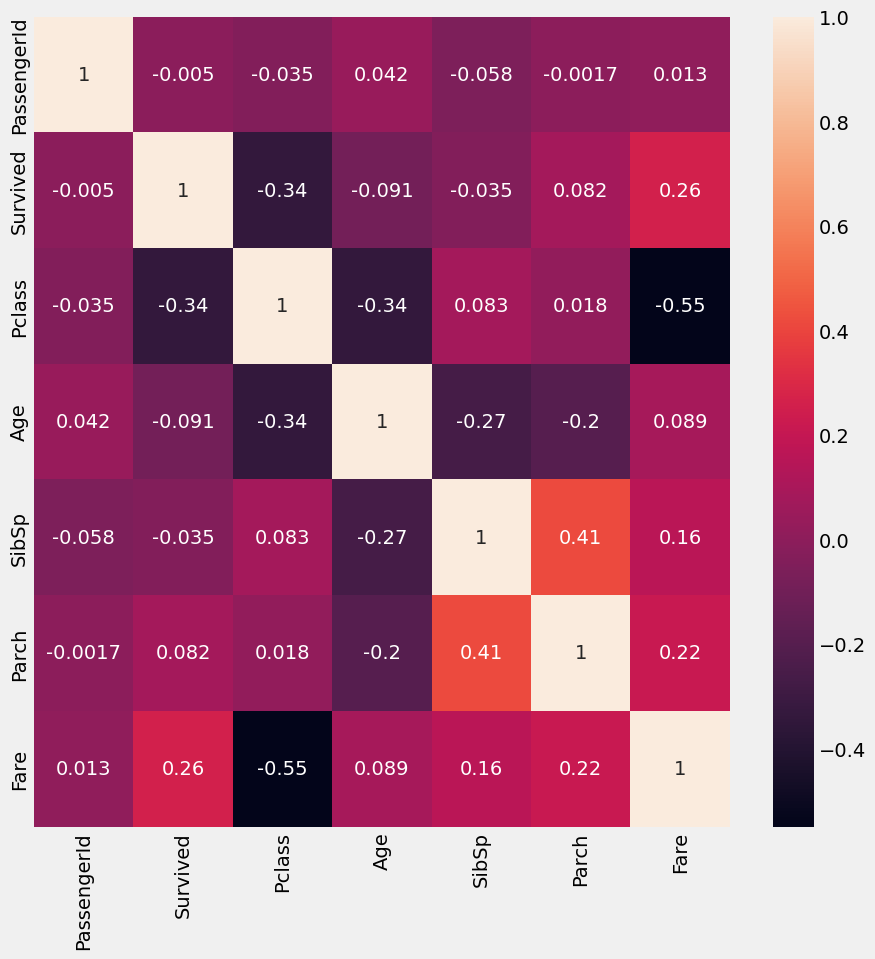

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

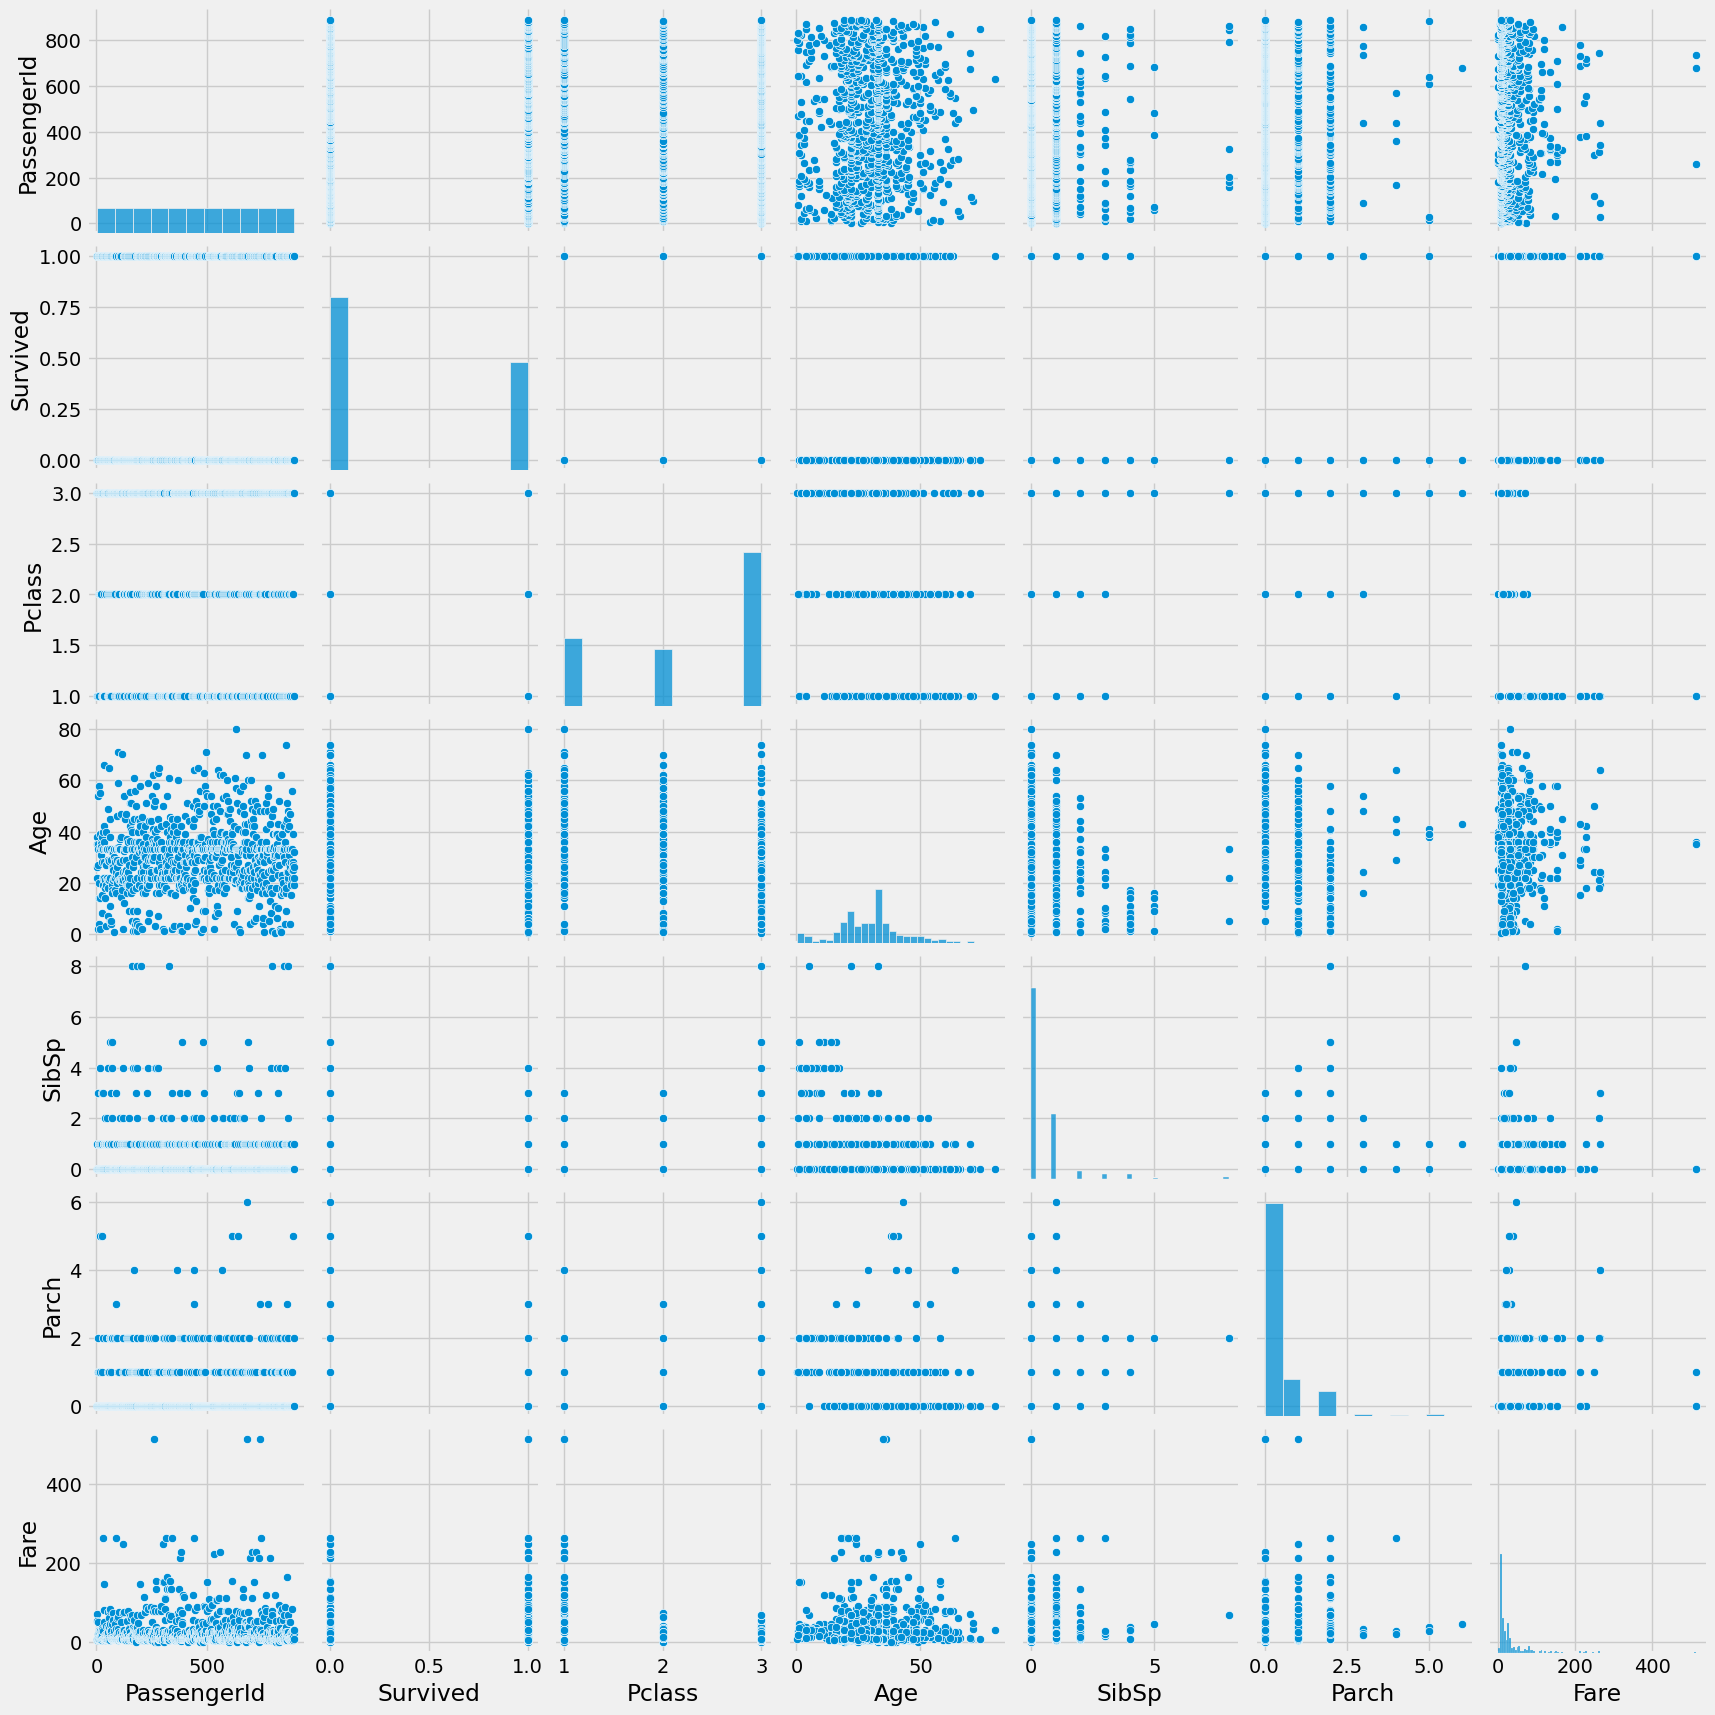

In [83]:
sns.pairplot(data)

In [86]:
# Multicollinearity - where there is 1 feature affecting another feature
# Identify which column have positive, negative or no correlation at all

 # Perform the Feature Engineering
 
 * Remove columns that are not important
 * Use some columns to create a new feature
 
 * Convert continuous into categorical value

In [87]:
data['Age_cat'] = 0
data.loc[data['Age']<=16,'Age_cat'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_cat'] = 1
data.loc[(data['Age']>32)&(data['Age']<=50),'Age_cat'] = 2
data.loc[(data['Age']>50)&(data['Age']<=70),'Age_cat'] = 3
data.loc[data['Age']>70,'Age_cat'] = 4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [88]:
data['Age_cat'].value_counts()

1    382
2    341
0    104
3     59
4      5
Name: Age_cat, dtype: int64

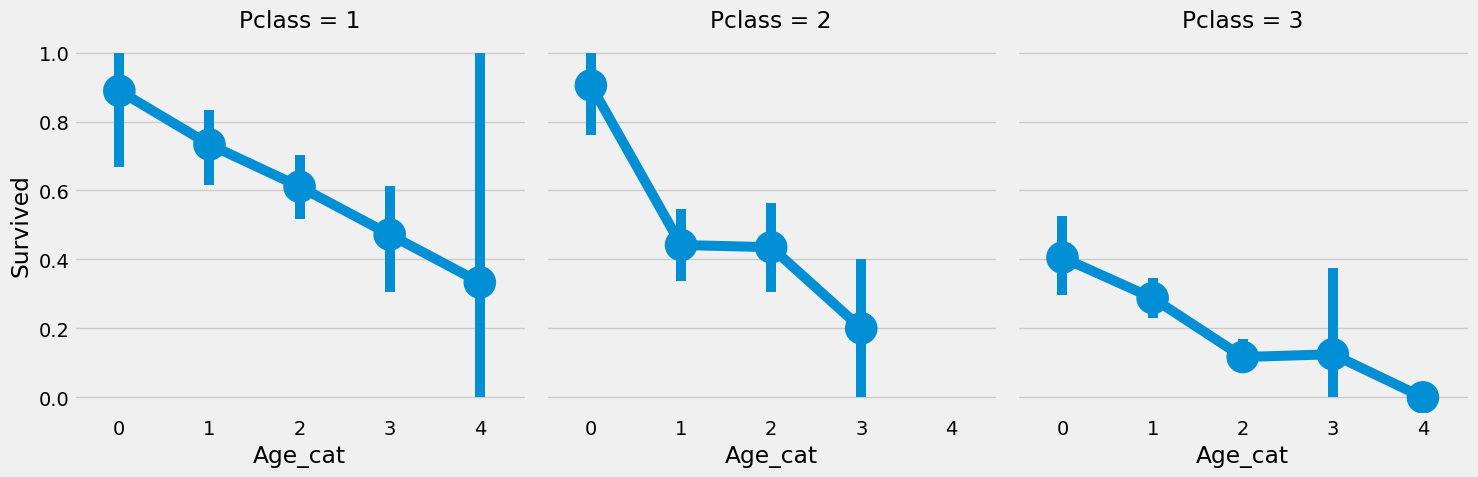

In [92]:
sns.catplot(data, x='Age_cat', y='Survived', col='Pclass', kind = 'point')
